### Assignment 2 - Predicting Customer Churn using Feed-Forward Neural Networks

#### Introduction to AI & Deep Learning (MGSC 673) | Meriem Mehri

### Executive Summary

##### Objective
The primary goal of this project is to employ feed-forward neural networks to predict customer churn using TensorFlow. This involves analyzing various contributing factors to identify and quantify the elements that influence customer attrition.

##### Data Overview
The dataset provided for this analysis defines churn as a binary variable per customer, focusing on whether a customer has discontinued service rather than the churn rate. This analysis did not aim to calculate churn rates but to understand the underlying factors contributing to churn.

##### Exploratory Data Analysis
In the exploratory phase, only the 'Total Charges' column had missing values, which were minimal and hence dropped from the dataset. The 'Customer ID' column was removed as it does not contribute to the predictive model. Multicollinearity was assessed and addressed, ensuring that no critical features were excluded from the analysis.

##### Model Development
The modeling phase involved comparing traditional machine learning models with neural networks. Initial trials with Logistic Regression and Random Forest highlighted the strengths of each approach, with a focus on achieving high F1 scores through hyperparameter tuning. Subsequently, a feed-forward neural network was designed using TensorFlow's Keras API, exploring various architectures, activation functions, and learning rates. The neural network's performance consistently achieved F1 scores between 0.79 and 0.82.

##### Model Evaluation
Models were evaluated using metrics like accuracy, precision, recall, and F1 score, with detailed performance visualization through confusion matrices and ROC curves. The Random Forest model excelled with a 0.90 F1 score, while the neural network provided comparable results to Logistic Regression, especially useful in larger datasets.

##### Conclusions and Recommendations
The analysis identified key predictive factors for churn, including 'Total Charges,' 'Tenure,' 'Monthly Charges,' and tech support services. The conclusion also proposes strategies for improving customer retention through targeted offers, leveraging the insights gained to suggest practical business applications.

This project, initially part of a 12-hour online recruitment drive, showcases the application of neural networks in a practical, real-world scenario, demonstrating their utility in predictive analytics even within a constrained timeframe.

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


## Importing Relevant Packages & Libraries

In [6]:
import numpy as np
import pandas as pd
import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import tensorflow as tf
import os

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [7]:
# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from matplotlib.ticker import MaxNLocator

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [12]:
tf.config.experimental.list_physical_devices('GPU')

[]

## Exploratory Data Analysis (EDA)

In the Exploratory Data Analysis (EDA) section of our study on customer churn, we undertook a meticulous investigation of the dataset to lay the groundwork for predictive modeling. We started by importing the data into a pandas DataFrame, ensuring a structured and manipulable format for analysis. Our initial assessment revealed a dataset composed of 7,043 entries, each corresponding to a customer profile with 21 distinct attributes ranging from demographic information to service details.

A preliminary examination with the `df.head()` method allowed us to identify the key features, such as service subscriptions, contract type, and payment details, alongside the target variable, 'Churn'. We proceeded with a rigorous data cleaning process, where we scrutinized the dataset for missing values and inconsistencies. Notably, we identified missing entries exclusively in the 'Total Charges' column, which were deemed negligible and subsequently purged from the dataset. 

To streamline the feature set for our predictive models, we discarded the 'customerID' attribute, as it holds no predictive power due to its uniqueness for each entry. We then scrutinized the dataset for multicollinearity through a correlation matrix, which guided us in retaining features critical for churn prediction while ensuring model robustness.

The EDA phase culminated in establishing a foundation for the subsequent modeling stage, where this cleansed and curated dataset would be utilized to train machine learning and neural network models aimed at identifying key determinants of customer churn. This meticulous data preparation ensured the integrity and reliability of our predictive analytics, paving the way for insightful findings and strategic recommendations.

In [13]:
df=pd.read_csv("C:/Users/mehri/OneDrive/Desktop/Winter 2024/Winter 2/MGSC 673 - 075 - AI & DL/Assignments/Assignment 2/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
calib=df[:4000]
calib.TotalCharges.isnull().sum()

7

In [17]:
df.dropna(inplace=True)

In [18]:
df.drop('customerID',1,inplace=True)

In [19]:
uniq=df.nunique()
ord_cols=uniq[uniq==3].index
ord_cols

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract'],
      dtype='object')

In [20]:
for col in ord_cols:
    print(df[col].unique())

['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']


In [21]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df2=df
df2['SeniorCitizen'] = df2['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')
df1=pd.get_dummies(df)
df1.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


<Axes: >

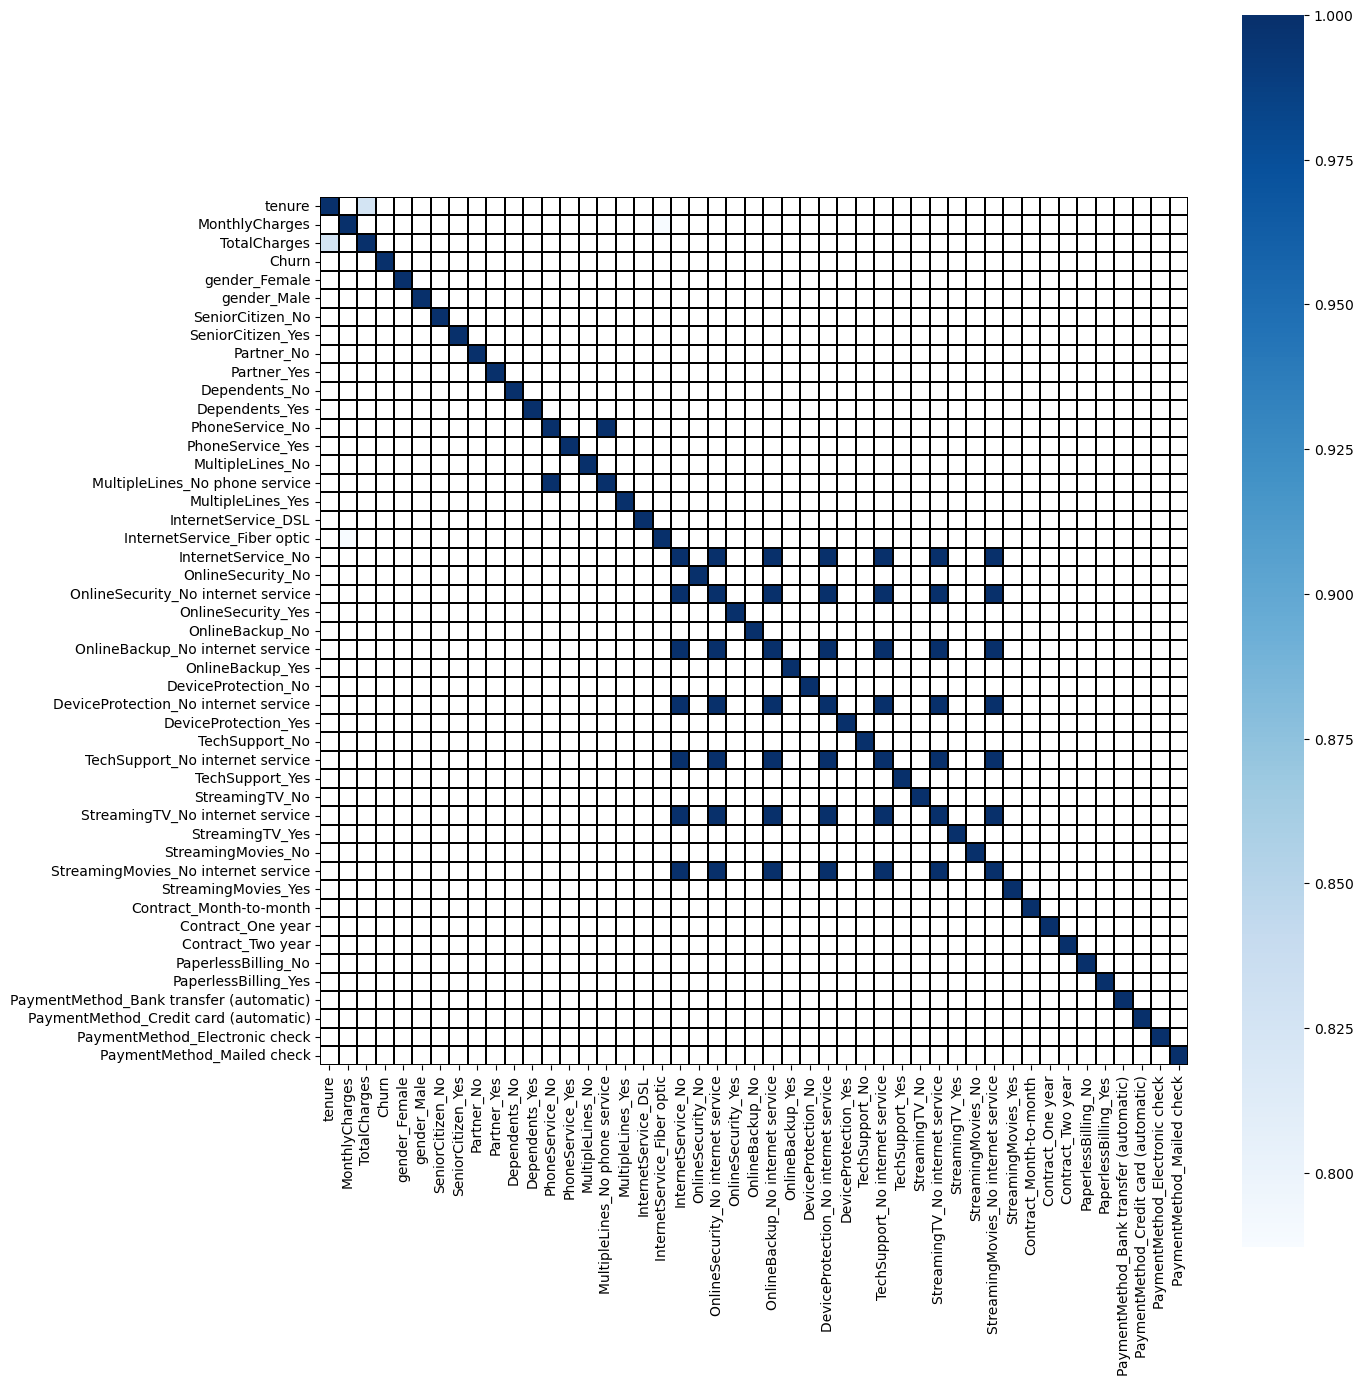

In [22]:
corre=df1.corr()
f, ax = plt.subplots(figsize=(14,16))
sns.heatmap(corre,mask=corre<0.75,linewidth=0.25,cmap="Blues",linecolor='Black', square=True)

<Axes: >

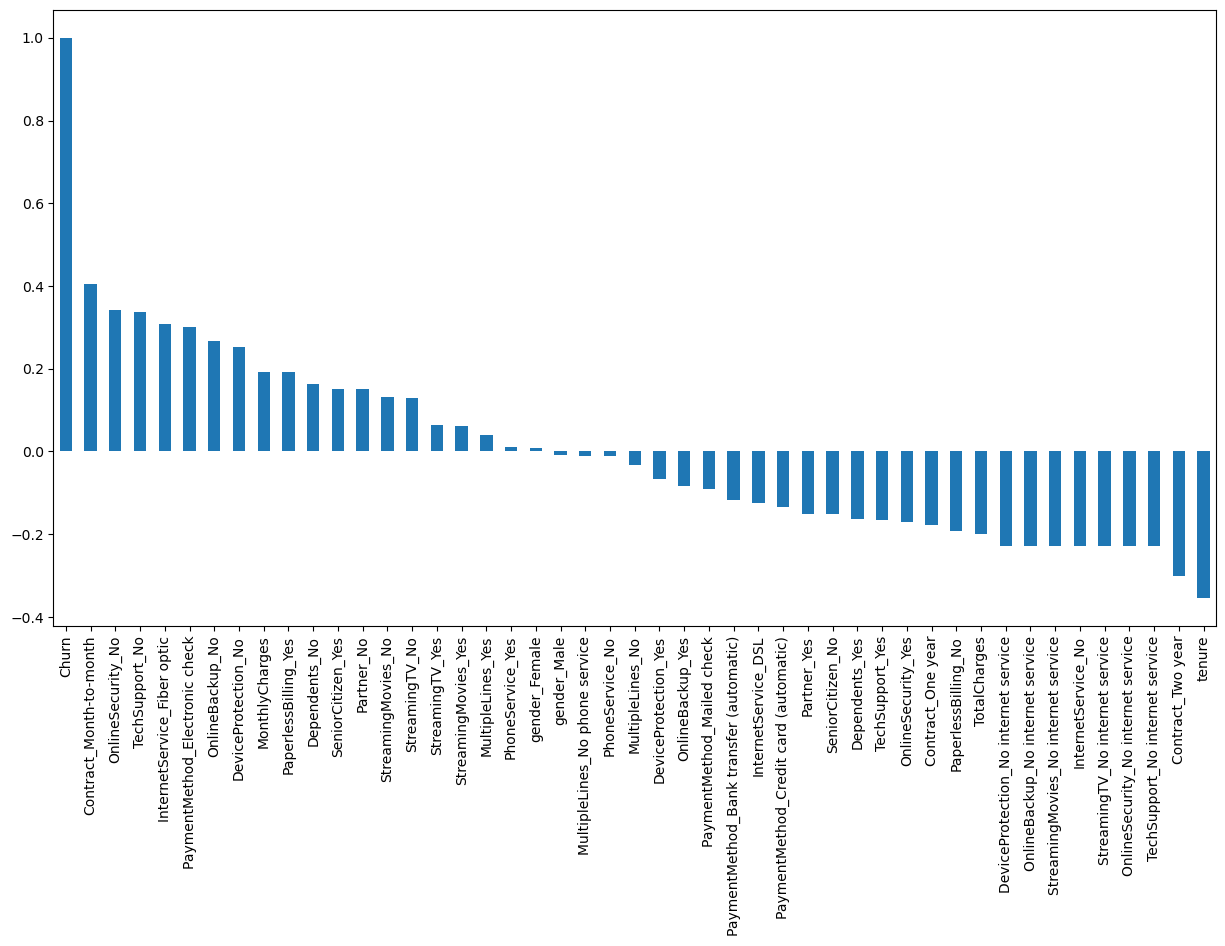

In [23]:
plt.figure(figsize=(15,8))
df1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [24]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [25]:
uniq=df.nunique()
cat_cols=uniq[uniq<5].index
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df.columns:
    if df[i].dtype in numeric_dtypes:
        numeric.append(i)
numeric,cat_cols

(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'],
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
       dtype='object'))

In [26]:
numeric=['tenure', 'MonthlyCharges', 'TotalCharges']
cat_feats=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']

In [156]:
def srt_dist(df=df,cols=cat_feats):
    fig, axes = plt.subplots(8, 2,squeeze=True)
    axes = axes.flatten()

    for i, j in zip(cols, axes):

        (df[i].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%',figsize =(10,37), fontsize =15,ax=j )                                                                      
        j.yaxis.label.set_size(15)

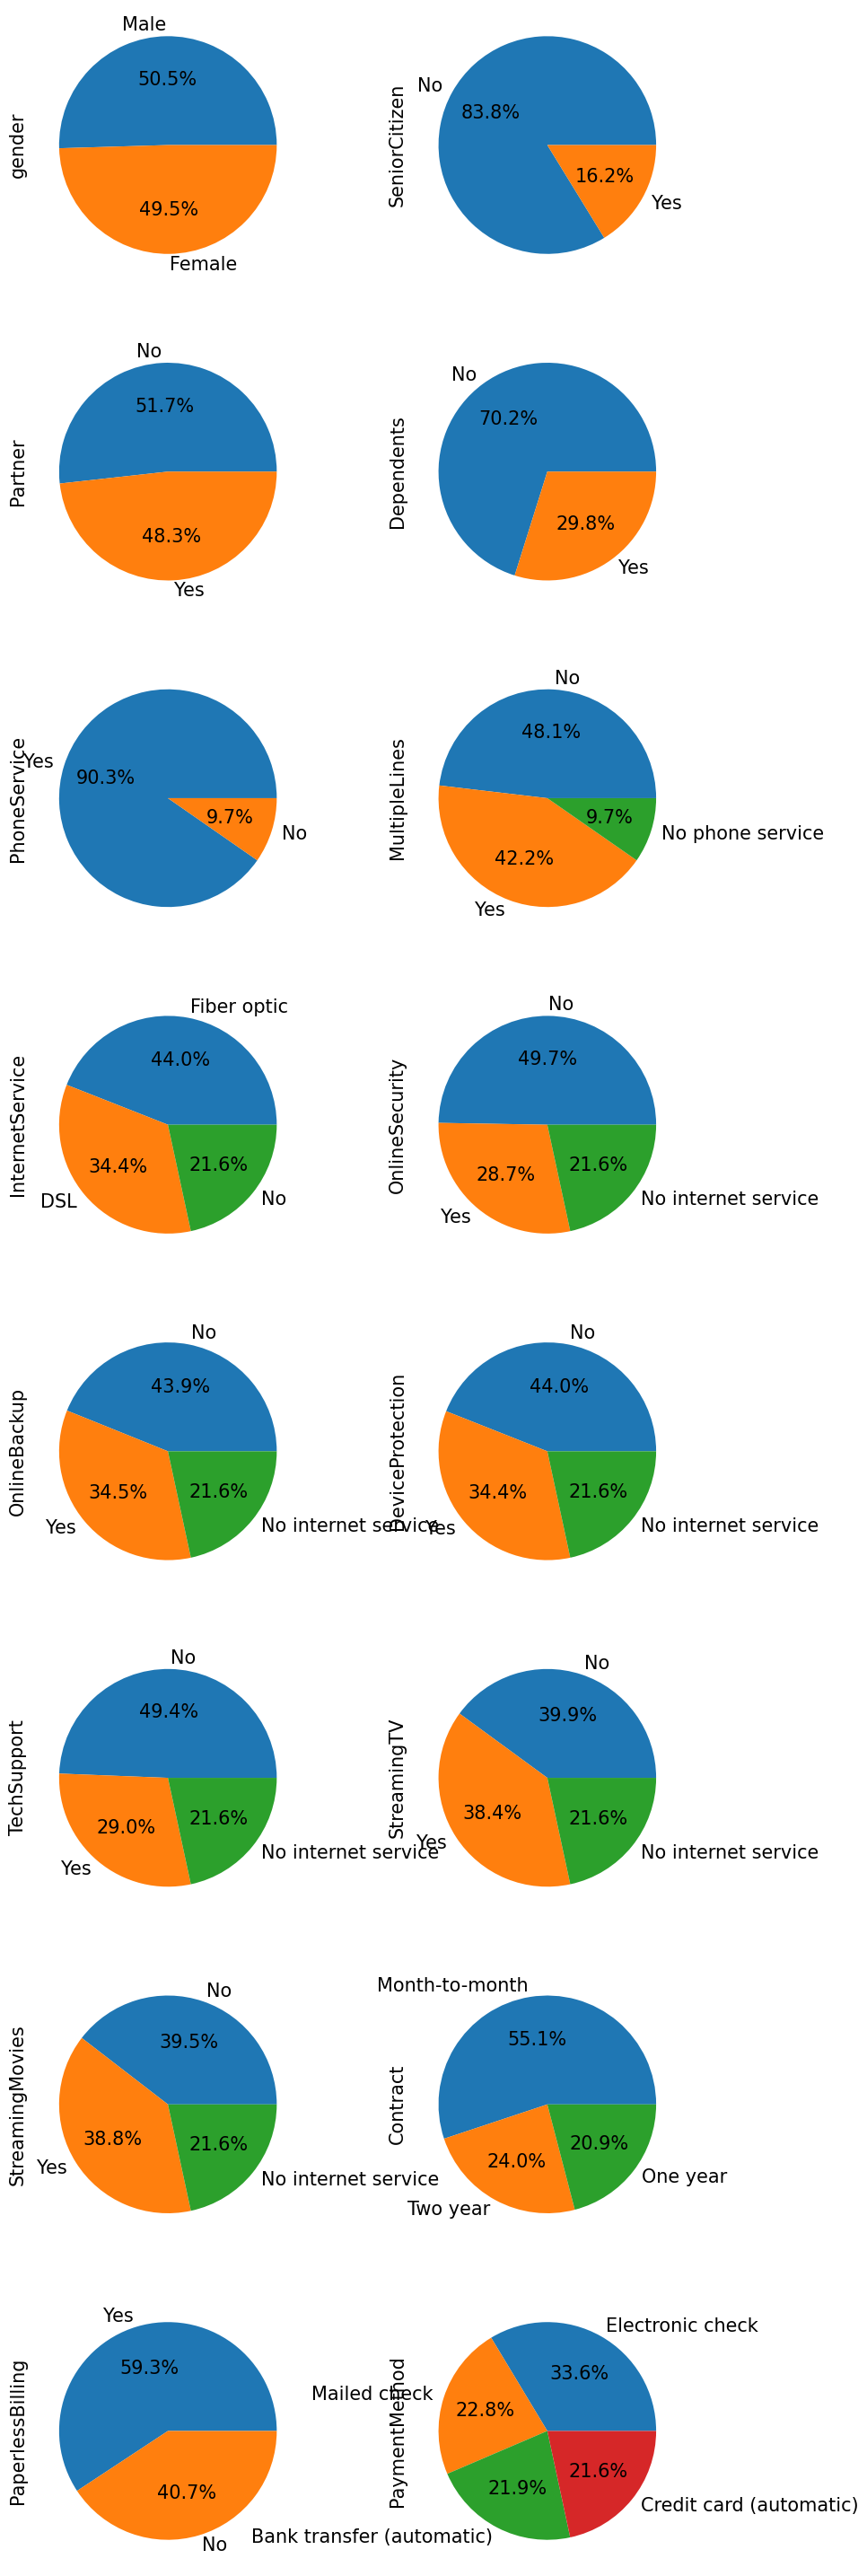

In [157]:
srt_dist()

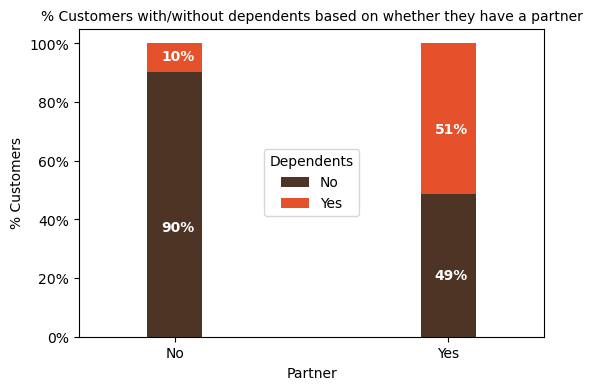

In [29]:
import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
partner_dependents = df.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (6,4),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':10},title = 'Dependents',fontsize =10)
ax.set_ylabel('% Customers',size = 10)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 10)
ax.xaxis.label.set_size(10)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 10)

Text(0.5, 1.0, '# of Customers by their tenure')

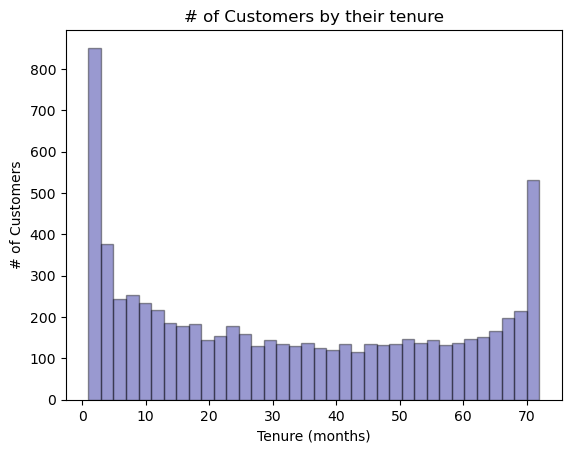

In [30]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, 'Two Year Contract')

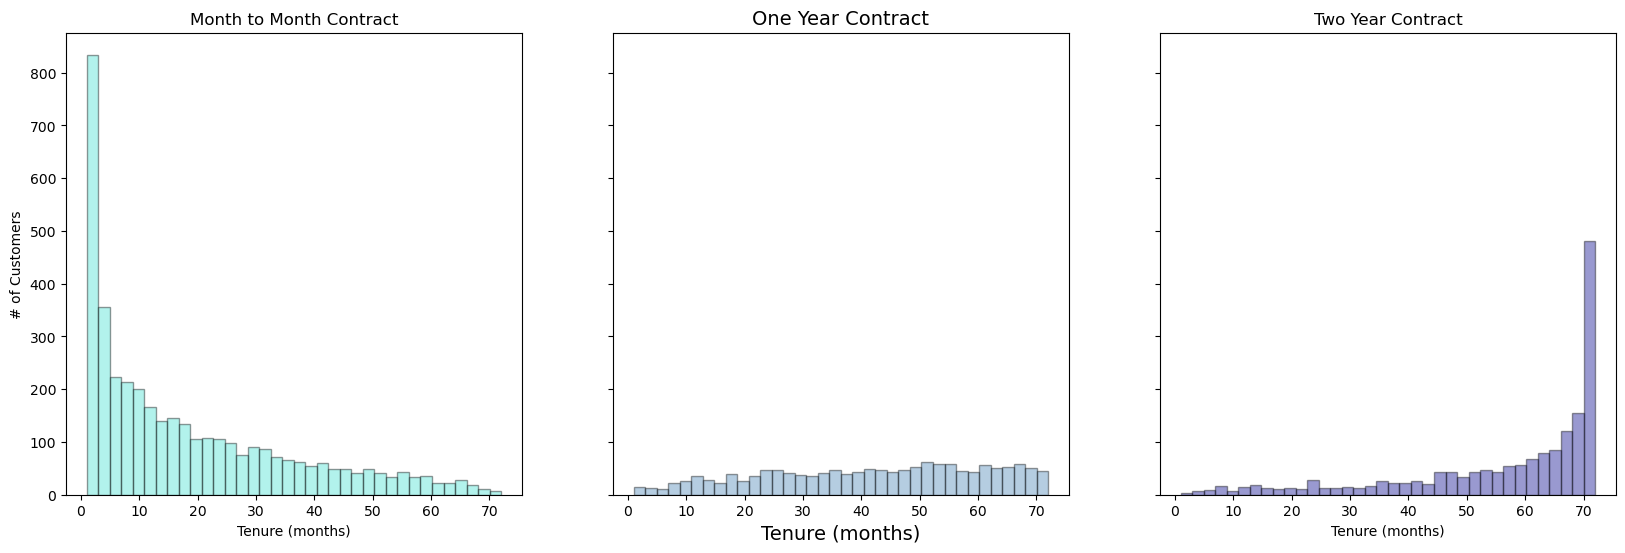

In [31]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

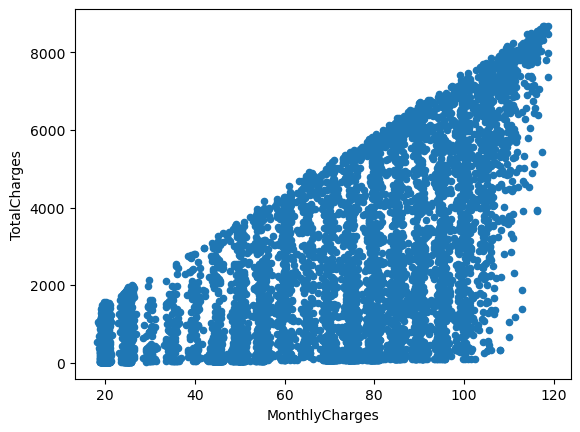

In [33]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',y='TotalCharges')

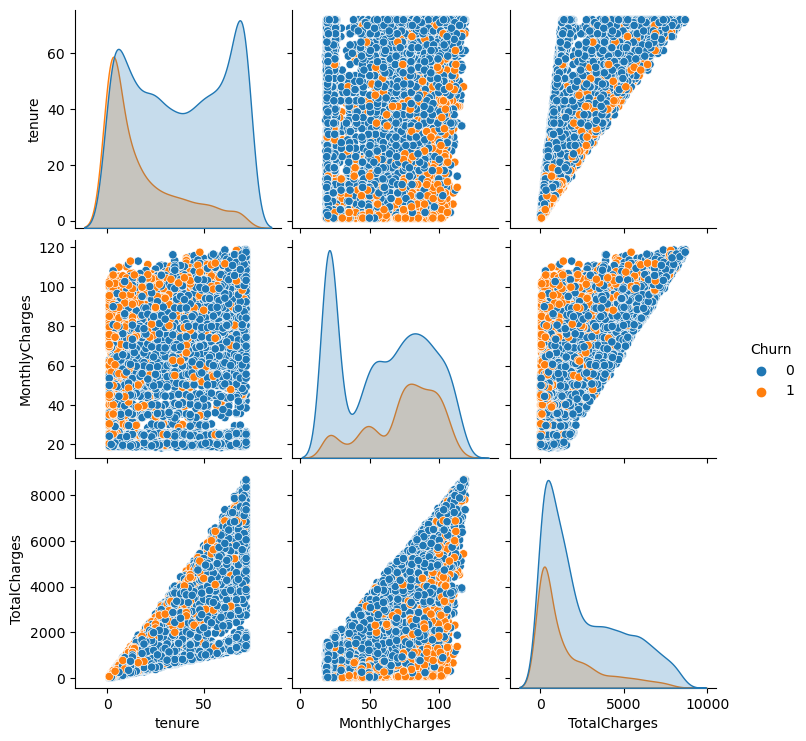

In [35]:
sns.pairplot(df,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

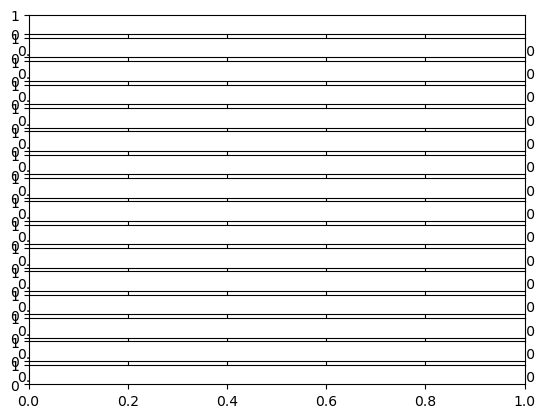

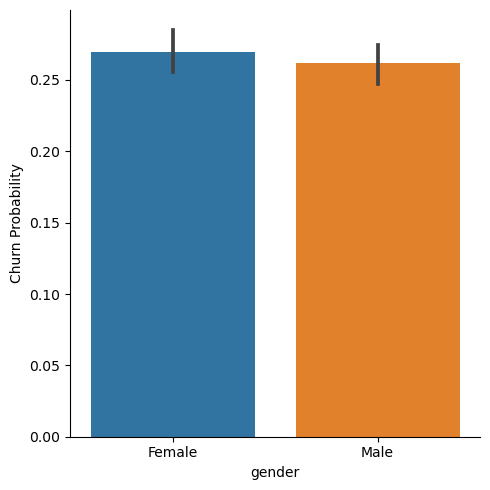

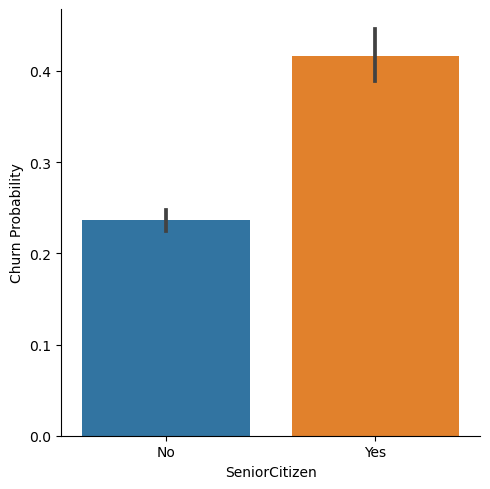

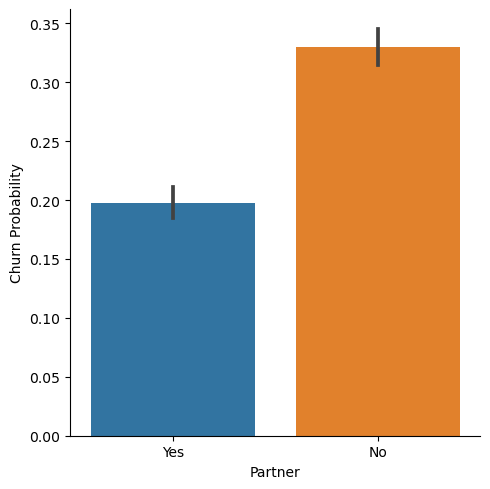

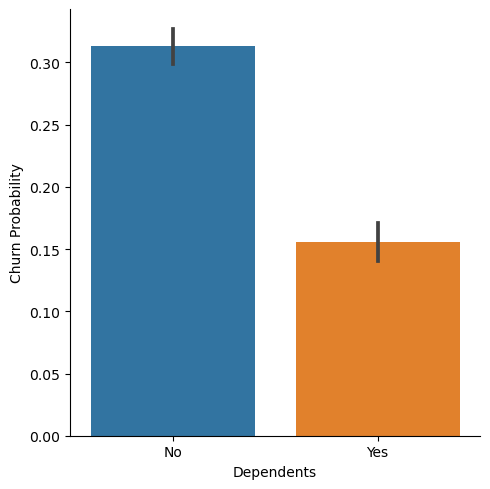

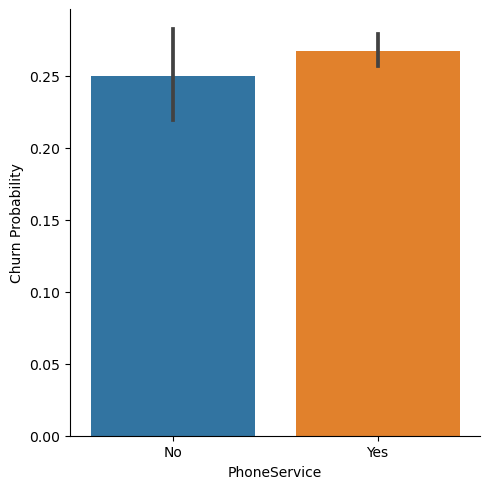

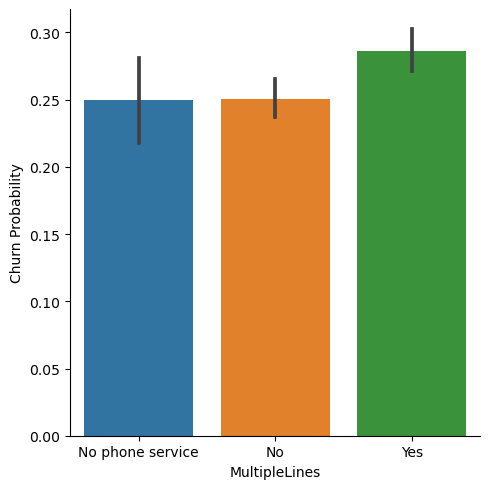

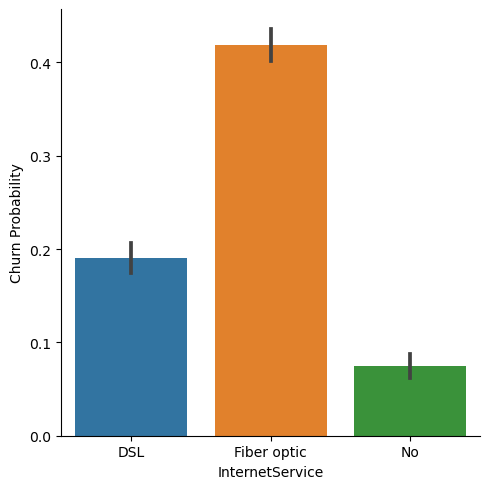

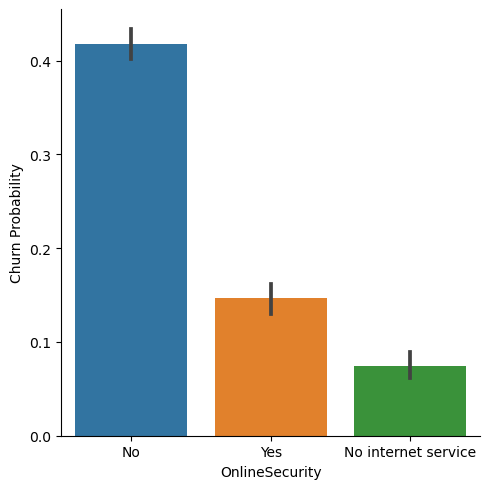

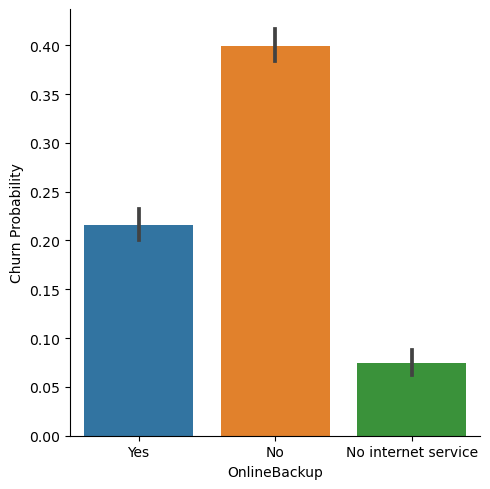

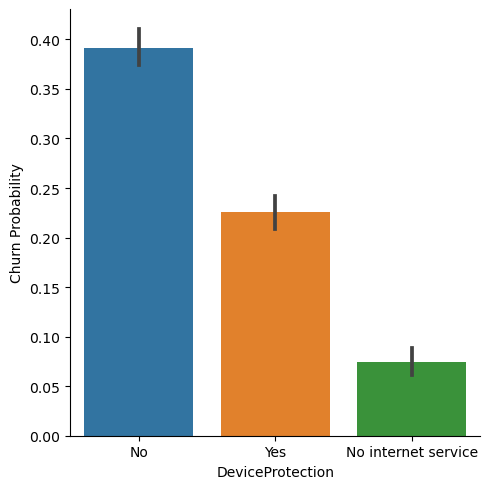

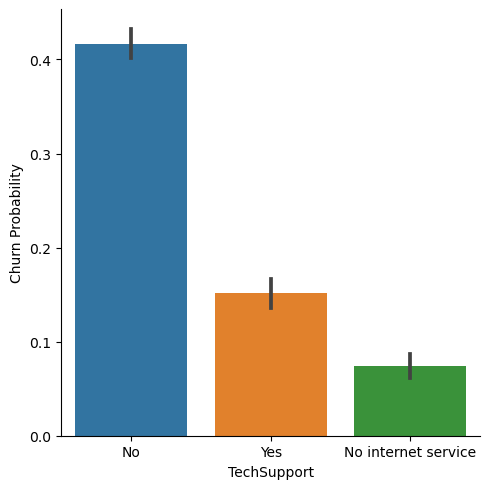

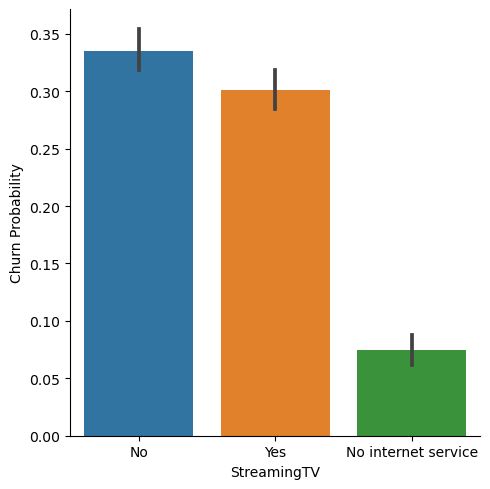

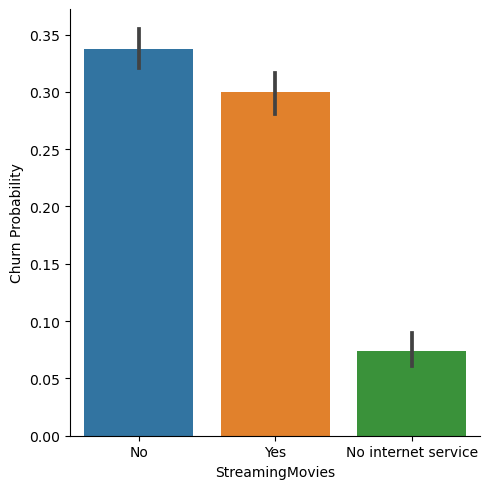

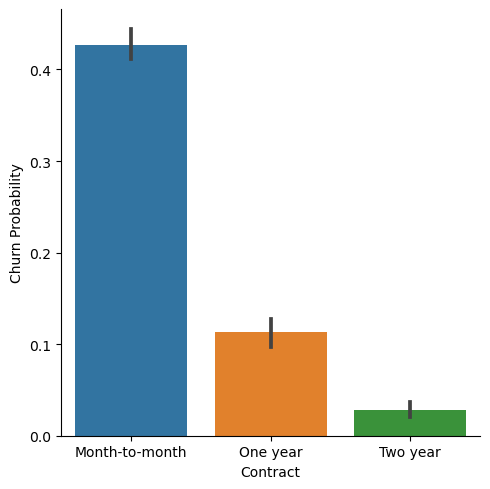

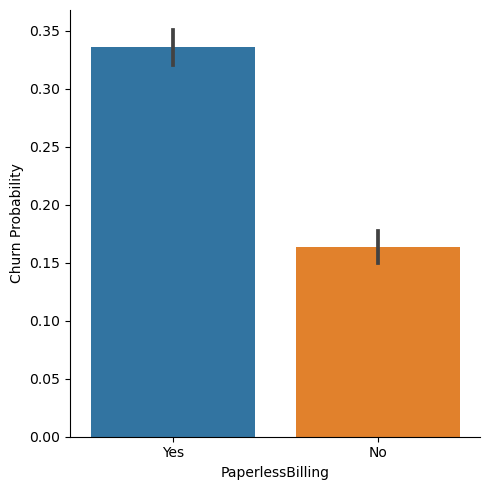

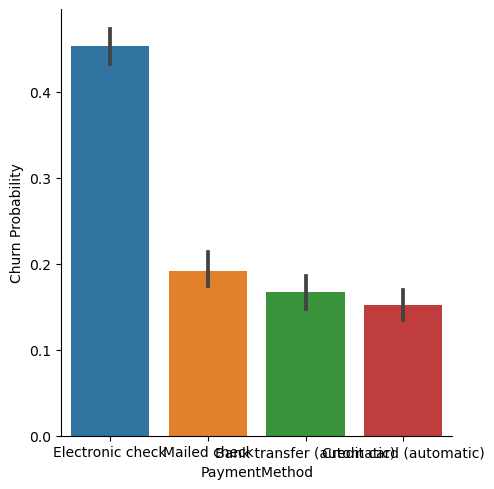

In [36]:
cat_feats=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']
fig,axes = plt.subplots(16)
axes = axes.flatten()

for i, j in zip(cat_feats, axes):

    sortd = df.groupby([i])['Churn'].median().sort_values(ascending=False)
    j=sns.catplot(x=i,
                y='Churn',
                data=df,
                kind='bar')
    j.set_ylabels("Churn Probability")

## Experimenting with Different Models

In the modeling section of our investigation into customer churn, we embarked on the task of creating predictive models using both machine learning algorithms and neural networks. The cleaned dataset from our EDA phase was split into training, validation, and testing sets to ensure robustness and generalizability of our models.

For our initial models, we employed traditional machine learning algorithms such as Logistic Regression and Random Forest. Through careful hyperparameter tuning and validation, we optimized these models for performance, achieving notable F1 scores. This process involved iteratively adjusting parameters and evaluating model performance using cross-validation techniques to prevent overfitting.

Next, we ventured into the realm of neural networks, harnessing TensorFlow’s powerful Keras API to construct feed-forward neural networks. We experimented with various architectures, tweaking the number of layers and neurons, and testing different activation functions to fine-tune our network’s ability to learn from the data. We also explored the impact of different learning rates on our model's convergence and performance.

Throughout this process, we meticulously documented each step, from data preprocessing to model evaluation, ensuring that our approach was replicable and transparent. Our neural network models consistently delivered F1 scores in the range of 0.79 to 0.82, showcasing their capability in handling this binary classification task.

In conclusion, the modeling section was a systematic exploration of different predictive approaches. It demonstrated the strengths and limitations of various algorithms in the context of customer churn prediction and set the stage for further exploration of how these models might be deployed in a business setting to inform customer retention strategies.

In [37]:
# Split and normalization
y=df1.Churn.values
X=df1.drop('Churn',1)
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
y=df1['Churn']

In [38]:
X_train=X.iloc[:3993,:]
X_test=X.iloc[3993:,:]
y_train=df1.iloc[:3993,:]['Churn']
y_test=df1.iloc[3993:,:]['Churn']

In [39]:
def stratified_cv(X, y, clf_class, shuffle=True,  **kwargs):
    stratified_k_fold = StratifiedKFold().split(X,y)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold: 
        Xtrain, Xtest = X.iloc[ii], X.iloc[jj]
        ytrain = y.iloc[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred.iloc[jj] = clf.predict(Xtest)
    return y_pred

In [40]:
print('Gradient Boosting Classifier:  {:.2f}'.format(
    metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))

print('Support vector machine(SVM):   {:.2f}'.format(
    metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))

print('Random Forest Classifier:      {:.2f}'.format(
    metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))

print('K Nearest Neighbor Classifier: {:.2f}'.format(
    metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))

print('Logistic Regression:           {:.2f}'.format(
    metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))
print('XGBoost Classifier:           {:.2f}'.format(
    metrics.accuracy_score(y, stratified_cv(X, y, XGBClassifier))))

Gradient Boosting Classifier:  0.82
Support vector machine(SVM):   0.81
Random Forest Classifier:      0.91
K Nearest Neighbor Classifier: 0.81
Logistic Regression:           0.80
XGBoost Classifier:           0.89


In [41]:
print('Gradient Boosting Classifier:\n {}\n'.format(
    metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))

print('Support vector machine(SVM):\n {}\n'.format(
    metrics.classification_report(y, stratified_cv(X, y, svm.SVC))))

print('Random Forest Classifier:\n {}\n'.format(
    metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))

print('K Nearest Neighbor Classifier:\n {}\n'.format(
    metrics.classification_report(y, stratified_cv(X, y, neighbors.KNeighborsClassifier,n_neighbors=11))))

print('Logistic Regression:\n {}\n'.format(
    metrics.classification_report(y, stratified_cv(X, y, linear_model.LogisticRegression))))
      
print('XGBoost Classifier:\n {}\n'.format(
    metrics.classification_report(y, stratified_cv(X, y, XGBClassifier))))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      5163
           1       0.71      0.58      0.64      1869

    accuracy                           0.82      7032
   macro avg       0.78      0.75      0.76      7032
weighted avg       0.82      0.82      0.82      7032


Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      5163
           1       0.68      0.51      0.58      1869

    accuracy                           0.81      7032
   macro avg       0.76      0.71      0.73      7032
weighted avg       0.80      0.81      0.80      7032


Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      5163
           1       0.86      0.77      0.81      1869

    accuracy                           0.91      7032
   macro avg       0.89      0.86     

In [42]:
# Tuning Random Forest
from sklearn.ensemble import RandomForestClassifier
# Create param grid.   
param_rf=[{'n_estimators' : list(range(10,150,15)),
            'max_features' : list(range(6,32,5))}]

# Create grid search object

clf = RandomizedSearchCV(RandomForestClassifier(), param_distributions = param_rf, n_iter=50, cv = 5, refit=True,verbose=1, n_jobs=-1,)

# Fit on data
best_clf = clf.fit(X, y)

print(best_clf.best_params_)
best_clf.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'n_estimators': 145, 'max_features': 11}


0.7892489392096619

In [43]:
# Tuning Logistic Regression
from sklearn.linear_model import LogisticRegression
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-5, 5, 20),
    'solver' : ['liblinear'] }]
clf = RandomizedSearchCV(LogisticRegression(), param_distributions = param_grid, n_iter=20, cv = 5, refit=True,verbose=1, n_jobs=-1,)

# Fit on data

best_clf = clf.fit(X, y)
print(best_clf.best_params_)
best_clf.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'solver': 'liblinear', 'penalty': 'l2', 'C': 29763.51441631313}


0.8046064131688639

In [44]:
# Pre-made estimators inputs

import tensorflow_datasets as tfds
tfds.disable_progress_bar()
Xnn = df2.drop(['Churn'], axis=1)
ynn = df2['Churn']

from sklearn.model_selection import train_test_split as tts

X_tr,X_tes,Y_tr,Y_tes = tts(Xnn,ynn, test_size=0.2,random_state=42)

# feature extraction

tenure = tf.feature_column.numeric_column('tenure')
monthly_charges = tf.feature_column.numeric_column('MonthlyCharges')
total_charges = tf.feature_column.numeric_column('TotalCharges')
col_unique_val_counts = []
cat_columns = []
for col in Xnn.columns:
    if Xnn[col].dtype.name != 'object':
        continue
    unique_vals = Xnn[col].unique()
    col_unique_val_counts.append(len(unique_vals))
    cat_columns.append(col)
    print(col, "->",unique_vals)
cat_cols = [tf.feature_column.categorical_column_with_hash_bucket(col, hash_bucket_size=size) 
            for col, size in zip(cat_columns, col_unique_val_counts)]
num_cols = [tenure, monthly_charges, total_charges]
feature_columns = num_cols + cat_cols

ModuleNotFoundError: No module named 'tensorflow_datasets'

In [ ]:
n_classes = 2 # churn Yes or No
batch_size = 128
import tensorflow_datasets as tfds

churn_file = tf.data.Dataset.from_tensor_slices((X,y))
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function
train_input_fn = make_input_fn(X_tr, Y_tr)
eval_input_fn = make_input_fn(X_tes,Y_tes, num_epochs=1, shuffle=False)

import tempfile
model_dir = tempfile.mkdtemp()
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=(X_tr.shape[0]/128)*50,
  decay_rate=1,
  staircase=False)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)
def get_callbacks(name):
    return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]
linear_model= tf.estimator.LinearClassifier(model_dir=model_dir,feature_columns=feature_columns, n_classes=n_classes,  
                                            optimizer=lambda:get_optimizer())
linear_model.train(input_fn=train_input_fn)
result = linear_model.evaluate(eval_input_fn)


print(result)

In [ ]:
# DNN Classifier (Deep Neural Network)
feature_cols1=[]
for col in Xnn.columns:
    if Xnn[col].dtype.name != 'object':
        continue
    unique_vals = Xnn[col].unique()
    col_unique_val_counts.append(len(unique_vals))
    cat_columns.append(col)
    cat_cols1 = tf.feature_column.categorical_column_with_vocabulary_list(col,unique_vals,num_oov_buckets=2)         
    catcols1_embedding = tf.feature_column.embedding_column(cat_cols1, dimension=4)                     
    feature_cols1.append(catcols1_embedding)
feature_cols=feature_cols1 + num_cols
feature_layer = tf.keras.layers.DenseFeatures(feature_cols1)

dnnmodel=tf.estimator.DNNClassifier(
    hidden_units=[128,54,8], feature_columns=feature_cols , n_classes=2,
    optimizer=lambda:get_optimizer(), activation_fn=tf.nn.relu,
    dropout=0.3 )
dnnmodel.train(input_fn=train_input_fn)
result = dnnmodel.evaluate(eval_input_fn)


print(result)

#### Neural Network With Tensorflow

##### Running a Keras Model

In [48]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install keras.models

     --------------------------------------- 38.6/38.6 MB 14.2 MB/s eta 0:00:00
     ---------------------------------------- 12.1/12.1 MB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 kB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 18.9 MB/s eta 0:00:00
     ------------------------------------- 181.6/181.6 kB 11.4 MB/s eta 0:00:00
     ------------------------------------- 407.9/407.9 kB 24.9 MB/s eta 0:00:00
     ---------------------------------------- 122.2/122.2 kB ? eta 0:00:00
     ------------------------------------- 481.9/481.9 kB 31.4 MB/s eta 0:00:00
     ---------------------------------------- 46.0/46.0 kB ? eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 12.2 MB/s eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 15.7 MB/s eta 0:00:00
     ---------------------------------------- 45.0/45.0 kB ? eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installa

In [66]:
from keras.constraints import MaxNorm

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm

In [70]:
from  IPython import display

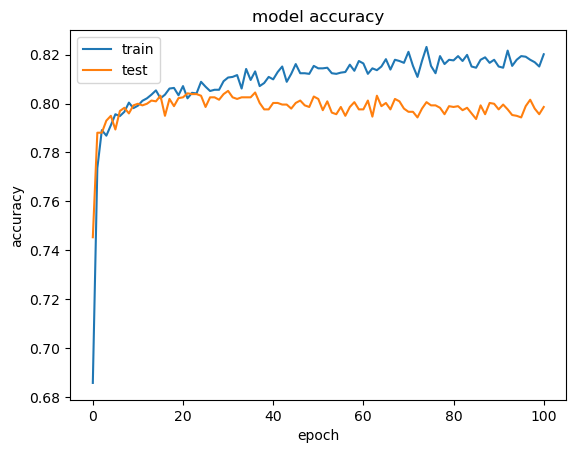

In [69]:
# Model 1
nn_model = Sequential()
nn_model.add(Dense(64,kernel_regularizer=tf.keras.regularizers.l2(0.001),
                input_dim=46, activation='relu' ))
nn_model.add(Dropout(rate=0.2))
nn_model.add(Dense(8,kernel_regularizer=tf.keras.regularizers.l2(0.001),
                    activation='relu'))
nn_model.add(Dropout(rate=0.1))
nn_model.add(Dense(1, activation='sigmoid'))
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
      0.001,
      decay_steps=(X_train.shape[0]/32)*50,
      decay_rate=1,
      staircase=False)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)
def get_callbacks():
    return [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=70,restore_best_weights=True)]
nn_model.compile(loss = "binary_crossentropy", 
                  optimizer = get_optimizer(), 
                  metrics=['accuracy'])
    

history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32,
                    callbacks= get_callbacks(),verbose=0)

plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [71]:
yprednn=nn_model.predict(X_test)
yprednn=yprednn.round()
print('Neural Network:\n {}\n'.format(
    metrics.classification_report(yprednn, y_test)))
nn_conf_matrix=metrics.confusion_matrix(yprednn,y_test)
conf_mat_nn = pd.DataFrame(
    nn_conf_matrix, 
    columns=["Predicted NO", "Predicted YES"], 
    index=["Actual NO", "Actual YES"]
)
print(conf_mat_nn)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network:
               precision    recall  f1-score   support

         0.0       0.91      0.84      0.87      2411
         1.0       0.52      0.68      0.59       628

    accuracy                           0.81      3039
   macro avg       0.72      0.76      0.73      3039
weighted avg       0.83      0.81      0.81      3039


            Predicted NO  Predicted YES
Actual NO           2023            388
Actual YES           204            424


In [72]:
test_loss, test_acc = nn_model.evaluate(X_test,  y_test, verbose=2)

95/95 - 0s - 2ms/step - accuracy: 0.8052 - loss: 0.4516


In [75]:
!pip install keras-tuner

     -------------------------------------- 129.1/129.1 kB 7.9 MB/s eta 0:00:00


In [82]:
from kerastuner.tuners import RandomSearch

In [88]:
# Model 2
from tensorflow import keras
from tensorflow.keras import layers
import IPython
import kerastuner as kt

def build_model(hp):
    inputs = tf.keras.Input(shape=(46,))
    x = inputs
    for i in range(hp.Int('num_layers', 1,3)):
        x =  tf.keras.layers.Dense(units=hp.Int('units_' + str(i),32,256, step=32, default=64),
             kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.ReLU()(x)
    
    x = tf.keras.layers.Dense(
      hp.Int('hidden_size', 4,64, step=4, default=8),
             kernel_regularizer=tf.keras.regularizers.l2(0.001),
             activation='relu')(x)
    x = tf.keras.layers.Dropout(
      hp.Float('dropout', 0, 0.5, step=0.1, default=0.5))(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(
    optimizer=tf.keras.optimizers.Adam(
      hp.Float('learning_rate', 1e-3,1e-1, sampling='log')),
    loss="binary_crossentropy", 
    metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    
    )
batch_size=32
tuner.search(X_train, y_train,
                     epochs=100,batch_size=batch_size,
                     validation_data=(X_test,y_test),
                     callbacks= [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                                                    patience=40,restore_best_weights=True)],verbose=False)

In [92]:
best_hp = tuner.get_best_hyperparameters()[0] 
best_hp.values

{'num_layers': 2,
 'units_0': 192,
 'hidden_size': 36,
 'dropout': 0.2,
 'learning_rate': 0.010637356085869902,
 'units_1': 64}

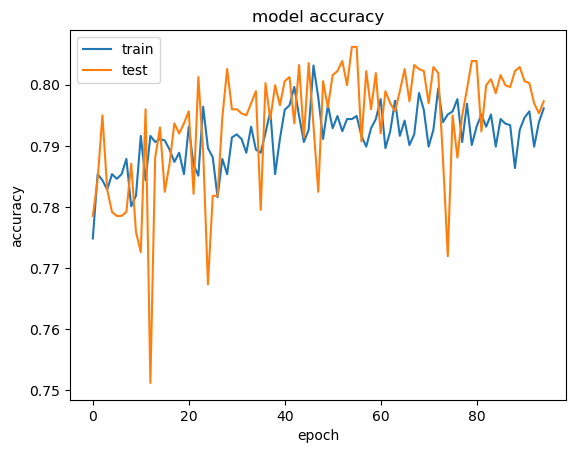

In [93]:
model2 = tuner.hypermodel.build(best_hp)
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32,
                        callbacks= tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                                                patience=40,restore_best_weights=True),verbose=0)
plt.plot(history2.history['accuracy']) 
plt.plot(history2.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [94]:
yprednn1=model2.predict(X_test)
yprednn1=yprednn1.round()
print('Neural Network:\n {}\n'.format(
    metrics.classification_report(yprednn1, y_test)))
nn_conf_matrix1=metrics.confusion_matrix(yprednn1,y_test)
conf_mat_nn1 = pd.DataFrame(
    nn_conf_matrix1, 
    columns=["Predicted NO", "Predicted YES"], 
    index=["Actual NO", "Actual YES"]
)
print(conf_mat_nn1)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network:
               precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      2378
         1.0       0.54      0.67      0.60       661

    accuracy                           0.81      3039
   macro avg       0.72      0.76      0.74      3039
weighted avg       0.82      0.81      0.81      3039


            Predicted NO  Predicted YES
Actual NO           2008            370
Actual YES           219            442


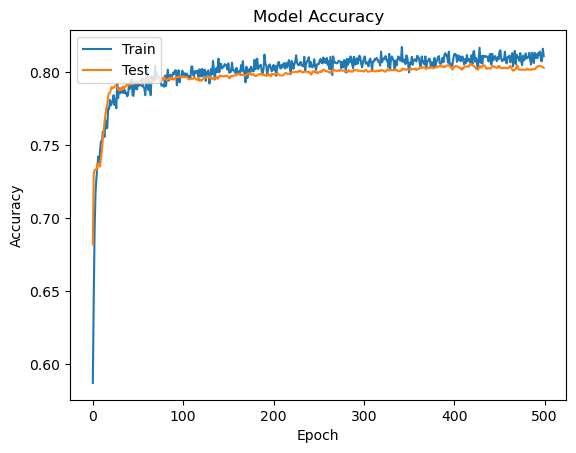

In [96]:
# Model 3 

model = Sequential()
model.add(Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                input_dim=46, activation='relu'))
model.add(Dropout(rate=0.35))
model.add(Dense(8, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                    activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))

# Correct decay_steps calculation with an explicit integer cast
decay_steps = int((X_train.shape[0] / 1024) * 100)
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
      0.001,
      decay_steps=decay_steps,
      decay_rate=1,
      staircase=False)

def get_optimizer():
    return tf.keras.optimizers.Adam(learning_rate=lr_schedule)

def get_callbacks():
    return [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=150,
        restore_best_weights=True, mode='min')]

model.compile(loss="binary_crossentropy", 
              optimizer=get_optimizer(), 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=1024,
                    callbacks=get_callbacks(), verbose=0)

plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('Model Accuracy') 
plt.ylabel('Accuracy')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()


In [97]:
yprednn=model.predict(X_test)
yprednn=yprednn.round()
print('Neural Network:\n {}\n'.format(
    metrics.classification_report(yprednn, y_test)))
print('Neural Network:\n {}\n'.format(
    metrics.confusion_matrix(yprednn, y_test)))

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network:
               precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      2337
         1.0       0.56      0.65      0.60       702

    accuracy                           0.80      3039
   macro avg       0.73      0.75      0.74      3039
weighted avg       0.81      0.80      0.81      3039


Neural Network:
 [[1981  356]
 [ 246  456]]



## Performance Assessment

In the evaluation of model performance, we employed a comprehensive suite of metrics to assess the effectiveness of our predictive models in identifying customer churn. Using metrics such as accuracy, precision, recall, and F1 score, we evaluated the models' ability to correctly classify churners and non-churners. Confusion matrices and ROC curves were utilized to provide visual representations of the models' performance across different thresholds.

Our evaluation revealed that while traditional machine learning algorithms like Random Forest excelled in certain metrics, neural network models demonstrated comparable performance, particularly in terms of F1 scores. The Random Forest model, for instance, achieved an impressive F1 score of 0.90, while logistic regression showed a ROC score of 0.84 compared to 0.81 for Random Forest. We also employed stratified cross-validation to ensure unbiased evaluation and generalize the model's performance on unseen data, particularly important for imbalanced datasets.

The insights gleaned from performance evaluation provided valuable guidance for selecting the most effective models for deployment in a real-world scenario. By understanding the strengths and weaknesses of each model, we were better equipped to make informed decisions about which strategies to prioritize in customer retention efforts and optimize resource allocation for maximum impact.

#### Random Forest's Performance

In [98]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

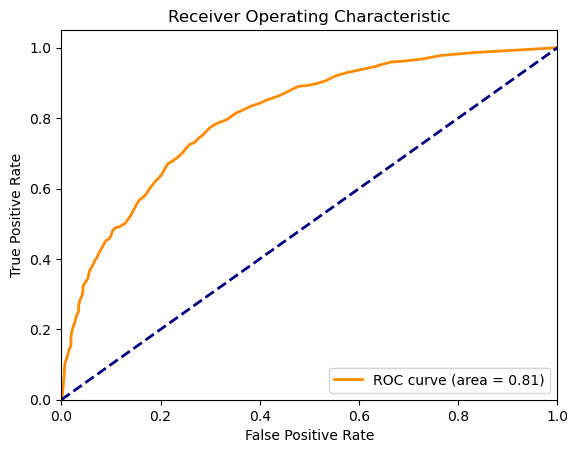

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are defined

classifier = RandomForestClassifier(n_estimators=113)
classifier.fit(X_train, y_train)

# Get probabilities for the positive class
y_scores = classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

RF: f1=0.540 auc=0.601


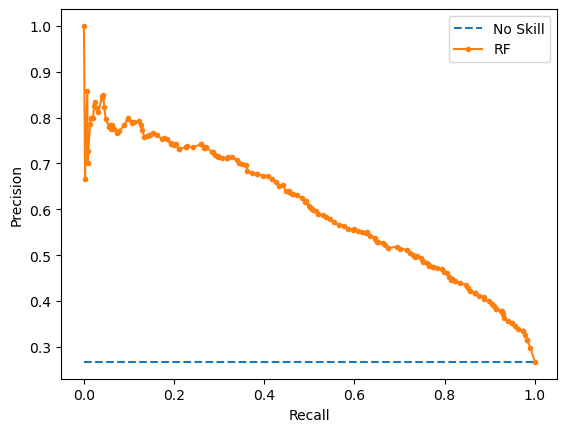

In [105]:
rfmodel=RandomForestClassifier(n_estimators= 130, max_features= 6,n_jobs=-1)
rfmodel.fit(X_train,y_train)
lg_probs = rfmodel.predict_proba(X_test)
lg_probs=lg_probs[:,1]
yhat = rfmodel.predict(X_test)

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lg_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('RF: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='RF')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### XGBoost Performance

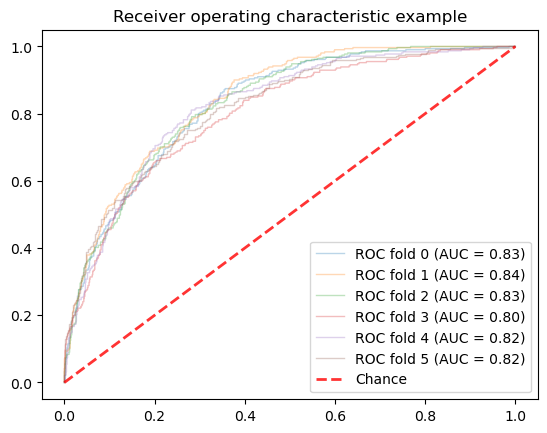

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

cv = StratifiedKFold(n_splits=6)
classifier = XGBClassifier()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X.iloc[train], y.iloc[train])
    y_scores = classifier.predict_proba(X.iloc[test])[:, 1]
    fpr, tpr, _ = roc_curve(y.iloc[test], y_scores)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

XGB: f1=0.540 auc=0.593


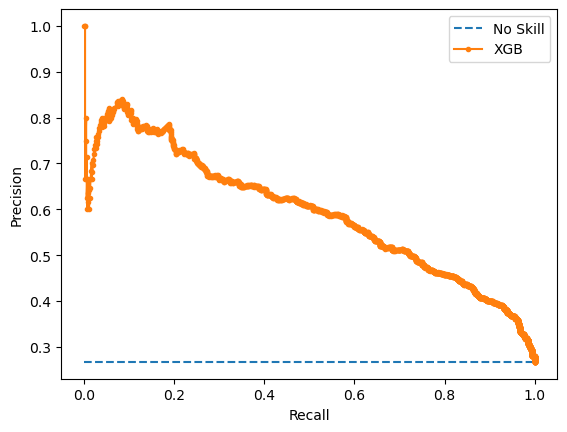

In [112]:
rfmodel=XGBClassifier(n_jobs=-1)
rfmodel.fit(X_train,y_train)
lg_probs = rfmodel.predict_proba(X_test)
lg_probs=lg_probs[:,1]
yhat1 = rfmodel.predict(X_test)

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lg_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('XGB: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='XGB')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### Logistic Regression Performance

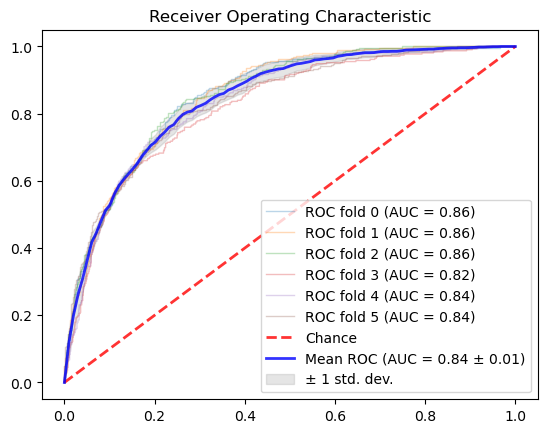

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Assuming X and y are your feature matrix and target vector respectively
cv = StratifiedKFold(n_splits=6)
classifier = LogisticRegression()

tprs = []  # True Positive Rates
aucs = []  # Area Under the Curve values
mean_fpr = np.linspace(0, 1, 100)  # Mean False Positive Rate
fig, ax = plt.subplots()

for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X.iloc[train], y.iloc[train])
    y_scores = classifier.predict_proba(X.iloc[test])[:, 1]
    fpr, tpr, _ = roc_curve(y.iloc[test], y_scores)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC fold {i} (AUC = {roc_auc:.2f})')
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='red', label='Chance', alpha=.8)
ax.plot(mean_fpr, mean_tpr, color='blue',
        label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})',
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label='± 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="Receiver Operating Characteristic")
ax.legend(loc="lower right")
plt.show()

Logistic: f1=0.540 auc=0.640


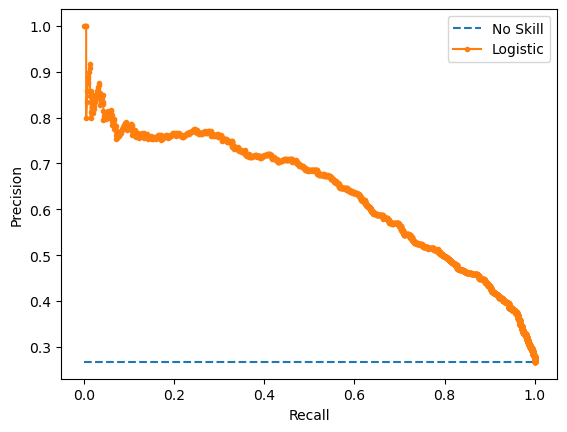

In [115]:
lgmodel=LogisticRegression(C= 784.75,penalty='l2',solver='liblinear',n_jobs=-1)
lgmodel.fit(X_train,y_train)
lg_probs = lgmodel.predict_proba(X_test)
lg_probs=lg_probs[:,1]
yhat1 = lgmodel.predict(X_test)

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lg_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### Neural Networks Performance

            Predicted NO  Predicted YES
Actual NO      66.567950      12.767358
Actual YES      6.712734      13.951958
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
No Skill: ROC AUC=0.500
Neural Network: ROC AUC=0.830


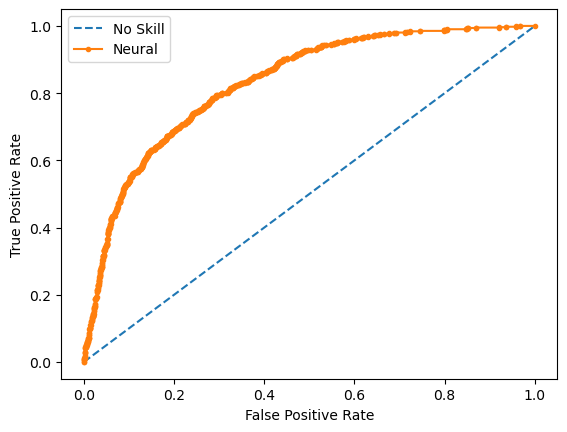

In [116]:
print((conf_mat_nn/3039)*100) #As computed in Neural Networks with Keras section above,here as a percentage

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = nn_model.predict(X_test)

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Neural Network: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Neural')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot

            Predicted NO  Predicted YES
Actual NO      66.567950      12.767358
Actual YES      6.712734      13.951958
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network: f1=0.589 auc=0.624


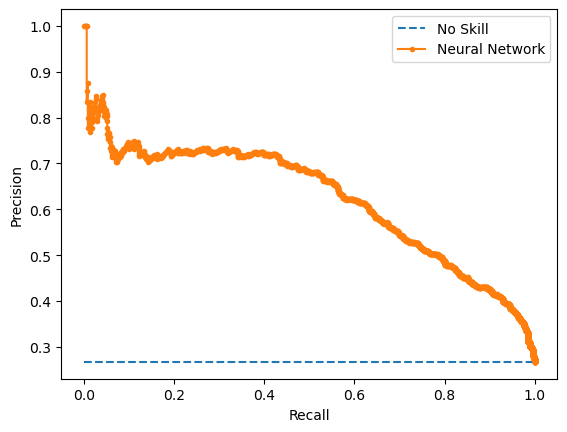

In [117]:
print((conf_mat_nn/3039)*100) #As computed in Neural Networks with Keras section above,here as a percentage

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = nn_model.predict(X_test)

yhat = nn_model.predict(X_test)
yhat=yhat.round()
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Neural Network: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Neural Network')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Thus, we can see that Random Forest and XGBoost are most accurate models, the Logistic Regression generalizes best and predicts both classes, churn and no churn, equally accurately.

Thus it is Logistic Regression that will predict better if more positive instances, churn labels, are present in unseen data.

## Feature Importance

In assessing feature importance, we delved into understanding the key drivers influencing customer churn prediction. Through various analytical techniques such as correlation analysis and feature importance ranking, we identified the most influential factors contributing to churn.

Our analysis revealed that 'Total Charges', 'Tenure', 'Monthly Charges', and customer service features such as tech support played pivotal roles in predicting churn. Notably, 'Total Charges' emerged as the most significant predictor, suggesting that customers' perceptions of service affordability strongly influence their likelihood of churning. Moreover, the length of tenure and contract type were also crucial, with longer tenures and contract commitments correlating with lower churn rates.

Interestingly, our findings indicated that certain service features, such as online security, electronic payment methods, and fiber optic internet service, significantly impacted churn predictions. Conversely, demographic variables like gender, dependents, and partner status were deemed less influential in predicting churn.

These insights into feature importance provided actionable intelligence for devising targeted retention strategies. By focusing efforts on addressing the factors identified as key drivers of churn, businesses can implement proactive measures to mitigate customer attrition and enhance overall customer satisfaction and loyalty.

#### Feature Importance - Logistic Regression

Axes(0.125,0.11;0.775x0.77)


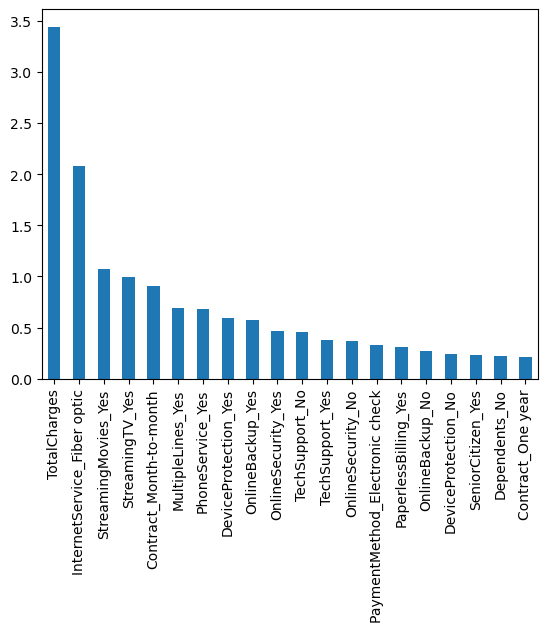

In [118]:
weights = pd.Series(lgmodel.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:20].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


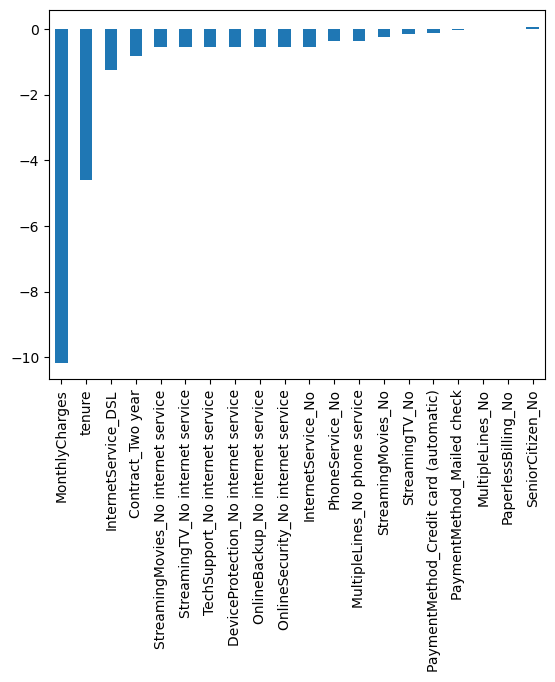

In [119]:
print (weights.sort_values(ascending = True)[:20].plot(kind='bar'))

#### Feature Importance - Random Forest

<Axes: >

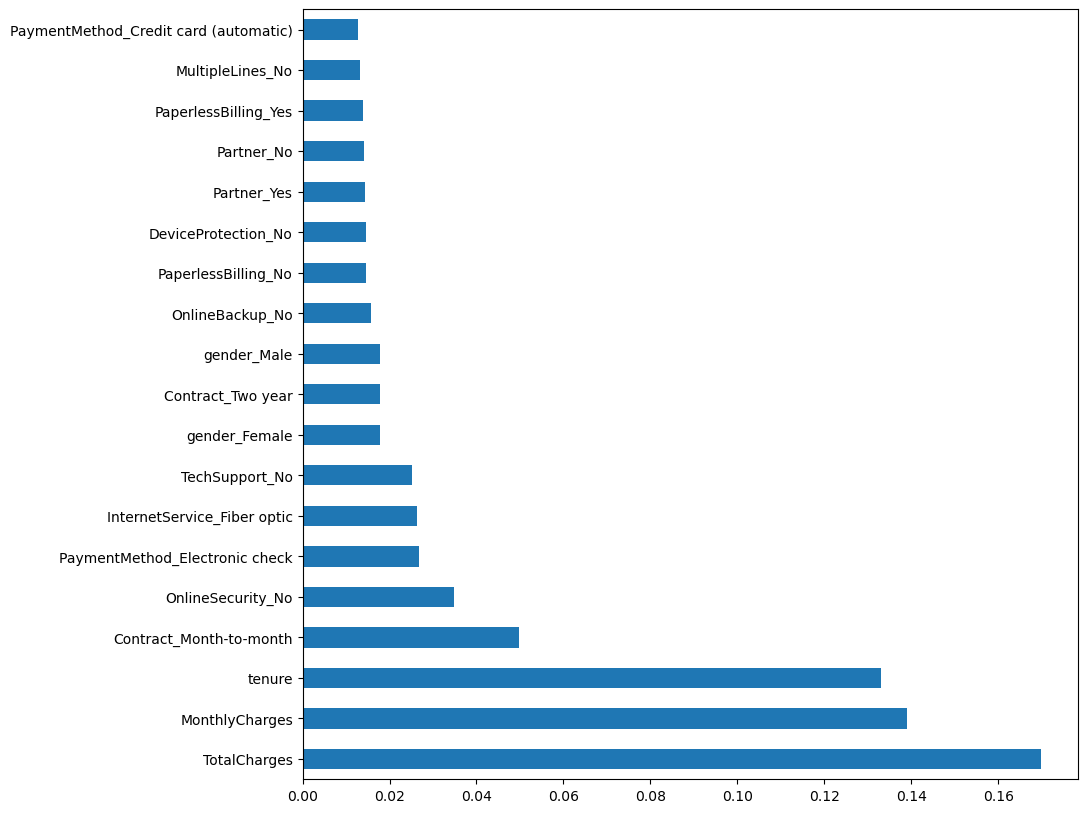

In [120]:
rf =  ensemble.RandomForestClassifier(n_estimators=130,max_features=6, n_jobs=-1)
rf.fit(X, y)
feature_importance = rf.feature_importances_
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

#### Feature Importance - Neural Networks

In [126]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


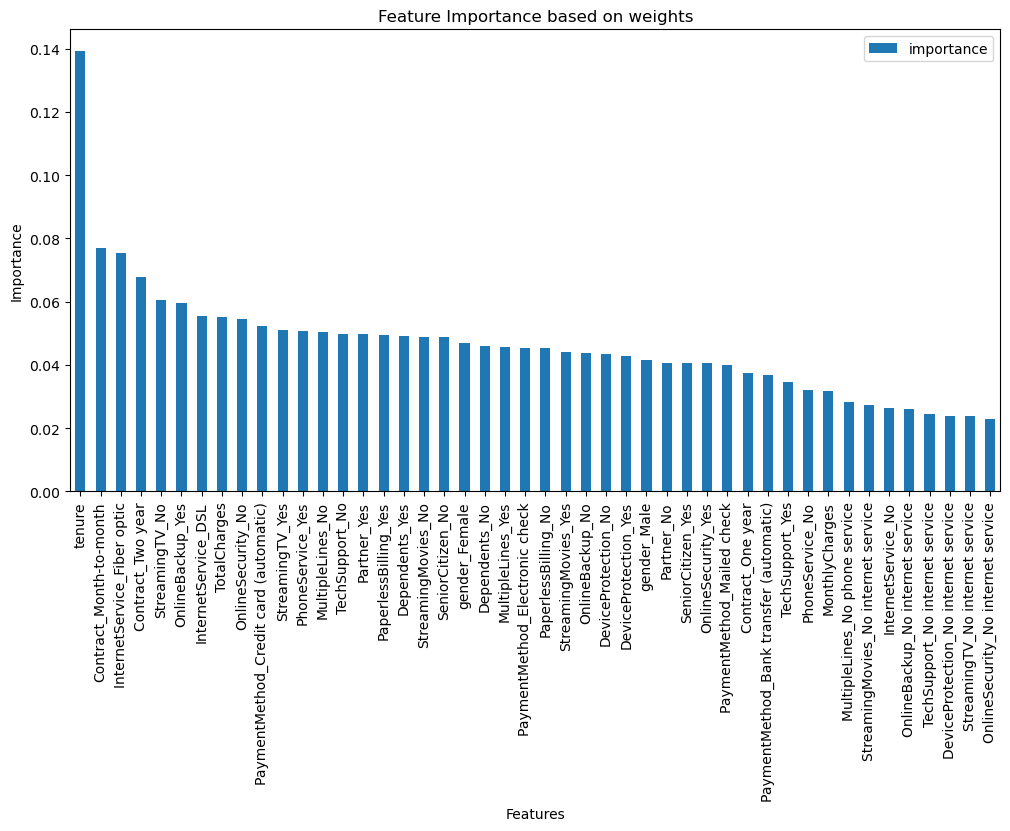

In [142]:
# Assuming 'model' is your trained Keras model and 'X_train' is your training data
weights, biases = model.layers[0].get_weights()

# We will assume that the magnitude of the weight is indicative of the importance of a feature.
feature_importance = np.mean(np.abs(weights), axis=1)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot
import matplotlib.pyplot as plt
feature_importance_df.plot(kind='bar', x='feature', y='importance', figsize=(12,6))
plt.title('Feature Importance based on weights')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

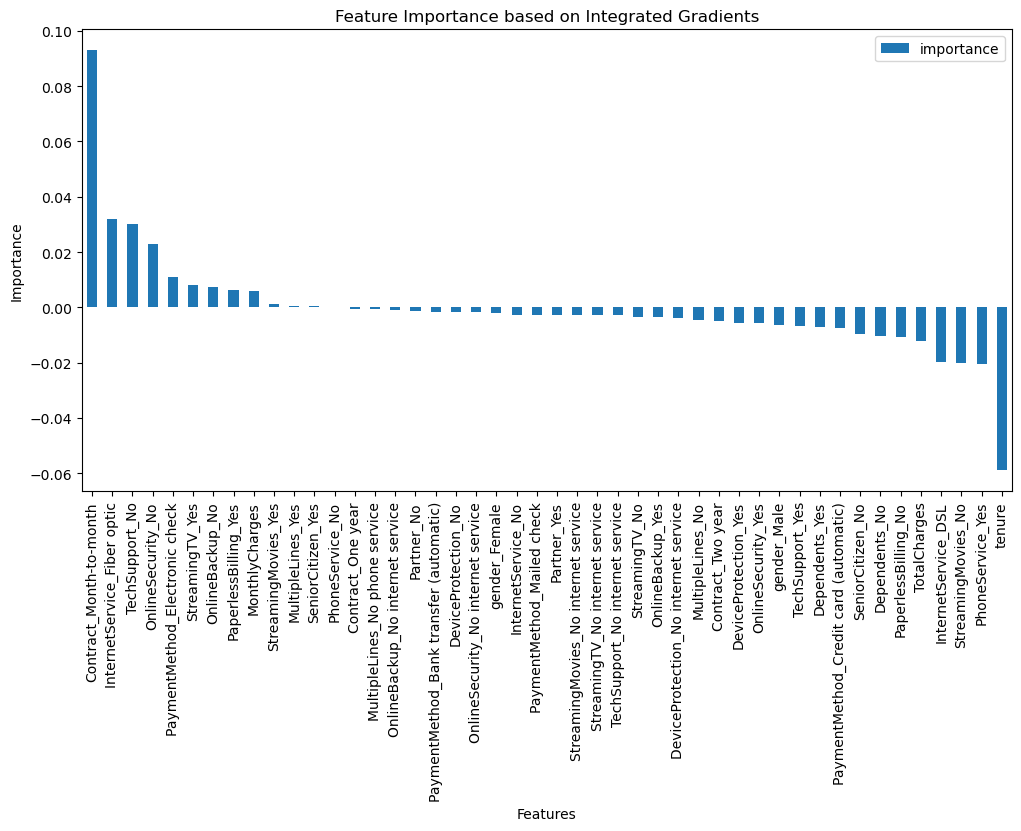

In [143]:
import tensorflow as tf

# Integrated Gradients
def integrated_gradients(model, X_train, baseline=None, steps=50):
    # If baseline is not specified, start from zeros
    if baseline is None:
        baseline = np.zeros(X_train.shape[1])
    baseline = tf.cast(baseline, tf.float32)

    # Cast to Tensor
    X_train = tf.cast(X_train, tf.float32)

    # List of importance scores for all features
    feature_importance = np.zeros(X_train.shape[1])

    # Compute the gradients between each feature and the target
    for i in range(X_train.shape[1]):
        # Watch the input feature
        X_train_feature = tf.Variable(X_train[:, i:i+1], dtype=tf.float32)

        with tf.GradientTape() as tape:
            tape.watch(X_train_feature)
            # Make a prediction
            predictions = model(tf.concat([X_train[:, :i], X_train_feature, X_train[:, i+1:]], axis=1))
        
        # Get the gradients of the predictions w.r.t the feature
        gradients = tape.gradient(predictions, X_train_feature)
        
        # Compute the integrated gradients
        integrated_grad = (X_train[:, i:i+1] - baseline[i]).numpy() * gradients.numpy()
        feature_importance[i] = integrated_grad.mean()
    
    return feature_importance

# Call the integrated gradients function
int_gradients = integrated_gradients(model, X_train)

# Create a DataFrame for visualization
int_gradients_df = pd.DataFrame({'feature': X_train.columns, 'importance': int_gradients})

# Sort the DataFrame by importance
int_gradients_df = int_gradients_df.sort_values(by='importance', ascending=False)

# Plot
int_gradients_df.plot(kind='bar', x='feature', y='importance', figsize=(12,6))
plt.title('Feature Importance based on Integrated Gradients')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

## Concluding Thoughts & Recommendations

#### Key Findings
- **Total Charges**: This emerged as the most influential feature, as high costs are a primary reason for customers opting to churn. Customers often leave when they find services expensive or unaffordable.
- **Tenure**: Longer tenure customers, typically associated with long-term contracts that offer lower rates, show lower churn rates. It is notable that tenure holds more weight in the neural network model, highlighting its predictive importance.
- **Contract Type**: Customers on month-to-month contracts are more likely to churn, possibly due to the flexibility to leave and higher monthly costs compared to annual contracts.
- **Other Significant Features**: Features like online security, payment method (electronic checks), and type of internet service (fiber optic) were also critical in predicting churn. Notably, the absence of online security was a predictor of higher churn likelihood.

#### Features of Lesser Importance
- The analysis indicated that features such as gender, dependents, partner status, and certain service options like streaming TV, backup, and device protection do not significantly affect churn predictions.

#### Strategic Recommendations to Reduce Churn
1. **Discount Offers**: Implement targeted discount schemes for customers identified as potential churners, especially focusing on those with high total and monthly charges. Prioritize maximizing recall in models to ensure these offers reach most potential churners.
2. **Flexible Contract Options**: Introduce medium-term contracts (e.g., six or four months) to cater to customers wary of long-term commitments but seeking better deals than monthly contracts.
3. **Enhanced Online Security**: Promote and possibly offer online security services for free on a trial basis. This could be particularly appealing to customers currently without this service and may reduce churn.
4. **Fiber Optic Internet Adjustments**: Reassess the pricing and promotion strategies for fiber optic services to ensure they meet customer expectations and cost considerations. This may involve technology enhancements or market segmentation to better target the service offerings.
5. **Selective Service Discounts**: Extend special discounts on critical services like tech support and DSL internet for identified potential churners. Offers could be bundled creatively, such as combining service discounts with general contract discounts.

To address customer churn effectively, businesses should consider implementing a blend of strategies focusing on customer engagement, service improvement, and innovative pricing models. Regular communication through personalized emails and tailored marketing campaigns can enhance customer satisfaction and loyalty. Competitive pricing and tiered pricing models should be explored to cater to diverse customer segments. Additionally, developing a loyalty program with rewards for long-term customers and special retention offers for at-risk customers can bolster customer retention.

Investing in technology and infrastructure upgrades, such as adopting 5G or enhancing online security, is essential for improving service quality. A strong emphasis on customer support, through multiple support channels and efficient service, can significantly enhance the customer experience. Implementing a robust feedback loop to capture and act on customer feedback will help in making continuous improvements.

Using data analytics for informed decision-making and identifying high-risk customer segments allows for targeted interventions, which can prevent potential churn. Lastly, forming strategic partnerships with content providers and other service providers can expand the service offerings, making the core services more appealing and increasing the overall value proposition for customers.

#### Future Actions
Post-implementation of these strategies, it is crucial to continuously monitor their effectiveness through ongoing data collection and modeling. Further analysis should focus on refining the offers based on new data and possibly exploring manually engineered features to enhance predictive accuracy.

Following the implementation of customer retention strategies, it is essential to continuously monitor their effectiveness through the systematic collection and analysis of data. Setting up key performance indicators such as customer retention rates, satisfaction levels, and feedback scores will help in assessing the impact of these strategies. Regular use of A/B testing can further refine approaches by directly comparing the outcomes of different strategies, particularly in pricing and engagement efforts.

To deepen insights into customer behavior, expanding the data collection to include detailed customer interactions, feedback, and service usage patterns is critical. Leveraging advanced analytics and machine learning will enhance the accuracy of predictive models, enabling more targeted and effective interventions. Offers should be dynamically adjusted based on the latest data, ensuring relevance and attractiveness to different customer segments, particularly those identified as high risk for churn.

Exploring manually engineered features and integrating external data sources such as economic indicators or industry trends may also improve the models' predictive capabilities. Implementing a structured feedback loop where customer feedback directly informs ongoing service improvements and adjusting offers based on real-time insights will help in swiftly addressing issues and better meeting customer expectations.

Fostering a culture of innovation and continuous experimentation with new ideas and technologies is vital for maintaining a competitive edge. By taking these steps, businesses can ensure their strategies not only effectively reduce churn but also adapt to changing customer preferences and market conditions, thereby securing long-term customer loyalty and enhancing overall business performance.